# Ejercicio 1 . Sólido de revolución.

## Construyendo el método del trapecio.

El cuerpo de revolución que se muestra en la siguiente figura, se obtiene al girar la curva dada por:
$$
\begin{align*}
y = 1 + \left( \dfrac{x}{2} \right)^{2}, \hspace{0.5cm} 0 \leq x \leq 2
\end{align*}
$$
en torno al eje $x$.
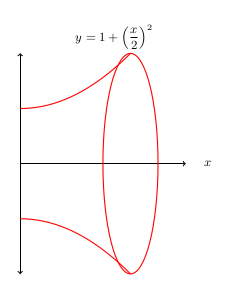

Resuelve:
1. Calcula el volumen del sólido, usando la regla extendida del trapecio con $N = 2, 4, 8, 16, 32, 64, 128$.
2. Evalúa el error para cada $N$. El valor exacto del volumen es es $I = 11.7286$.

Hay que definir inicialmente la función que queremos integrar, por tanto:
$$
\begin{align*}
I = \int_{a}^{b} f (x)\, d{x}
\end{align*}
$$
donde:
$$
\begin{align*}
f (x) = \pi  \bigg[ 1 + \left( \dfrac{x}{2} \right)^{2} \bigg]^{2}
\end{align*}
$$
Si graficamos la función anterior, tendremos:
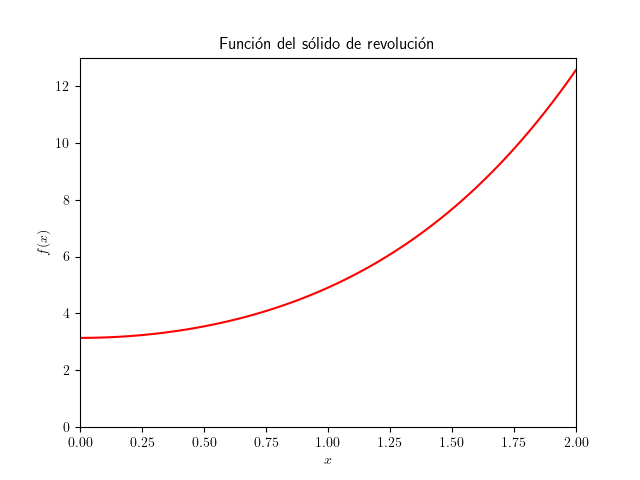

Las funciones que ocuparemos para la parte de integración quedarán dentro del módulo **<font color="blue">moduloIntegracion</code>**, para hacer las correspondientes llamadas en los archivos de los ejercicios.

In [ ]:
# Función con el método del trapecio

def trapecios(f, a, b, n):
    h = (b - a)/float(n)
    x = a
    suma = f(a)
    
    for i in range(1, n):
       x = x + h
       suma = suma + 2 * f(x)
    
    suma = suma + f(b)
    
    return h * (suma * 0.5)

In [ ]:
# Código con la función a integrar
import numpy as np

def f(x):
    return np.pi * (1 + (x/2)**2)**2

def error_rel(exacta, aproximacion):
    pass

In [ ]:
# Código para resolver el ejercicio
from prettytable import PrettyTable

tabla = PrettyTable()
tabla.field_names = ['n', 'h', 'integral', 'error']

paneles = [2, 4, 8, 16, 32, 64, 128]
exacta = 11.7286

for n in paneles:
    h = 2./n
    integral = trapecios(f, 0, 2, n)
    error = error_rel(exacta, integral)
    tabla.add_row([n, h, integral, error])

print(tabla)

De la tabla anterior, encontramos que el error relativo va disminuyendo de manera proporcional con $h^{2}$.

La siguiente gráfica se hizo con <code>matplotlib.pyplot</code> con el fin de ilustrar el proceso de integración con el método del trapecio. Se han utilizado otras funciones que nos permiten "dibujar" los bloques para los trapecios.

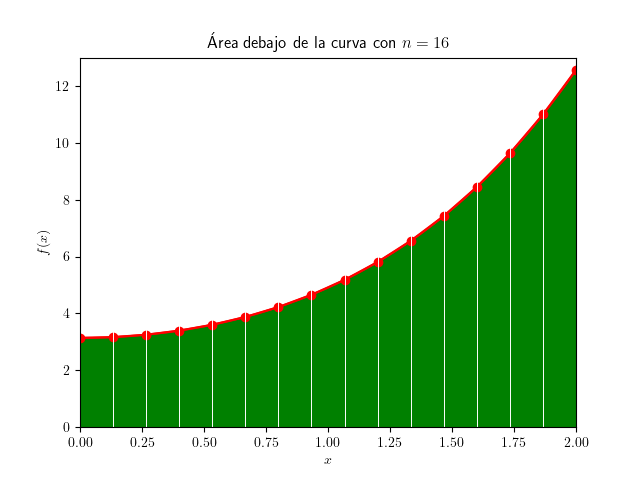

## Resolviendo el mismo ejercicio con scipy.

Para comparar el resultado que nos devuelve la función <code>scipy.integrate.quad</code>, veamos cómo implementar la solución del problema del sólido de revolución.

In [ ]:
from numpy import pi
from scipy.integrate import quad

def f(x):
    return pi*(1 + (x/2)**2)**2
   
print(quad(f, 0, 2))

El <font color="red">primer valor es el valor de la integral</font>, mientras que el <font color="blue">segundo valor es el error</font> asociado al algoritmo que usa <code>scipy.integrate.quad</font>, para que no lo reporte en el resultado, basta con indicar que queremos sólo el primer elemento de la lista:

In [ ]:
print(quad(f, 0, 2)[0])

# Regla de Simpson.

Estimar la integral:
$$
\begin{align*}
\int_{0}^{2.5} f (x) \, d{x}
\end{align*}
$$
a partir de los siguientes datos:

|   x   |    0   |   0.5   |   1.0   |   1.5  |   2.0   |   2.5  |
|:-----:|:------:|:-------:|:-------:|:------:|:-------:|:------:|
| f (x) | 1.5000 | 2.00000 | 2.00000 | 1.6364 | 1.25000 | 0.9565 |

Aunque el ejercicio no lo pide, hacemos una gráfica de los datos en la tabla:
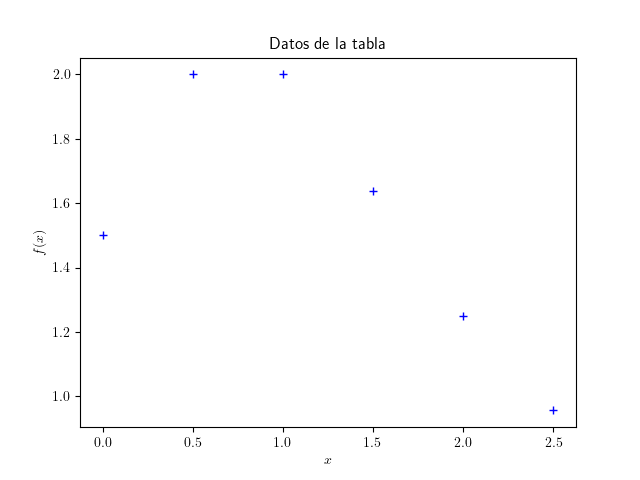

## Solución al ejercicio.

Usaremos las reglas de Simpson:
1. Dado que el número de bloques es impar, calculamos la integral sobre los primeros tres bloques con la regla $3/8$ de Simpson.
2. Usamos la regla de $1/3$ de Simpson en los dos últimos bloques.

Es decir:
$$
\begin{eqnarray*}
\begin{aligned}
I &= [f (0) + 3 \, f (0.5) + 3 \, f(1.0) + f \, (1.5)]\dfrac{3 \, (0.5)}{8} + [ f (1.5) + 4 \, f (2.0) + f (2.5)] \dfrac{0.5}{3} = \\
&= 2.8381 + 1.2655 = 4.1036
\end{aligned}
\end{eqnarray*}
$$

Al igual que en el caso de diferenciación numérica, las reglas que hemos definido suponen que contamos con una expresión para la función que queremos integrar. Por lo que debemos de ajustar el código para manejar pares de puntos $(x_{i}, f (x_{i}))$.

In [ ]:
# Regla de Simpson 1/8 para obtener la integral con pares de puntos

def simpson18puntos(f, x0, n, h):
    # n debe ser par
    n = n - n%2

    if n<=0: n = 1

    x = x0
    suma = 0

    for j in range(int(n/2)):
        suma += f[0] + 4. * f[1] + f[2]
        x += 2 * h

    return (h/3.) * suma

In [ ]:
# Regla de Simpson de 3/8 para obtener la integral por pares de puntos

def simpson38puntos(f, n, h):
    n = n - n%3

    if n <=0: n = 1

    suma = 0
    for j in range(int(n/3)):
        suma += f[0] + 3 * (f[1] + f[2]) + f[3]

    return (3. * h/8) * suma

In [ ]:
# Código completo  para el ejercicio

# from moduloIntegracion import simpson38puntos, simpson18puntos

x = [0, 0.5, 1.0, 1.5, 2.0, 2.5]
fx = [1.5000, 2.0000, 2.0000, 1.6364, 1.25000, 0.9565]

print(fx[:4])
print(fx[3:])

integral1 = simpson38puntos(fx[:4], 4, 0.5)
integral2 = simpson18puntos(fx[3:], fx[-3], 3, 0.5)

print('Valor de la integral por la  regla de 3/8 de Simpson = {0:1.6f}'.format(integral1))
print('\nValor de la integral por la  regla de 1/8 de Simpson = {0:1.6f}'.format(integral2))

print('\nValor de la integral = {0:1.6f}'.format(integral1 + integral2))

Luego de ejecutar el código, se obtiene el valor de la integral para los puntos de la tabla. $ I = 4.103558$

Mostramos a continuación una gráfica esquemática del procedimiento que realizamos.

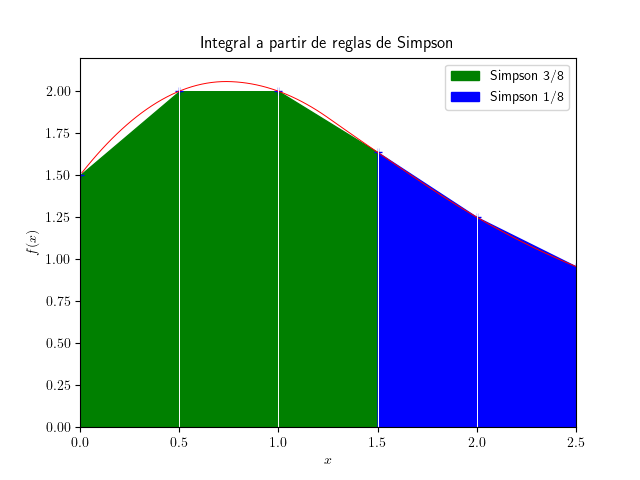